In [229]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

plt.figure(figsize=(20,20))
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('cb_2016_us_state_20m','states',drawbounds=True)


In [230]:
import pandas

In [231]:
input_data=pandas.read_csv('500_Cities__Local_Data_for_Better_Health__2017_release.csv')
input_data.describe()

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,CityFIPS,TractFIPS
count,810103.000000,789432.000000,789432.000000,789432.000000,8.099350e+05,8.100470e+05,7.820470e+05
mean,2014.716066,30.835291,29.096031,32.575900,3.203030e+04,2.606307e+06,2.592907e+10
std,0.450906,25.210650,24.671872,25.697762,2.568755e+06,1.686183e+06,1.675378e+10
min,2014.000000,0.200000,0.100000,0.300000,1.000000e+00,1.500300e+04,1.073000e+09
25%,2014.000000,9.700000,8.600000,10.900000,2.405000e+03,6.813440e+05,8.001009e+09
50%,2015.000000,23.000000,20.700000,25.300000,3.632000e+03,2.622000e+06,2.608100e+10
75%,2015.000000,45.600000,43.000000,48.500000,5.041000e+03,4.055000e+06,4.010911e+10
max,2015.000000,95.500000,94.100000,96.500000,3.087455e+08,5.613900e+06,5.602100e+10


In [232]:
input_data.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2015,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,...,15.7,NaN,NaN,308745538.0,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
1,2015,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,...,15.0,NaN,NaN,308745538.0,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
2,2015,US,United States,NaN,US,BRFSS,Health Outcomes,59,Arthritis among adults aged >=18 Years,%,...,22.7,NaN,NaN,308745538.0,NaN,HLTHOUT,ARTHRITIS,NaN,NaN,Arthritis
3,2015,US,United States,NaN,US,BRFSS,Health Outcomes,59,Arthritis among adults aged >=18 Years,%,...,24.9,NaN,NaN,308745538.0,NaN,HLTHOUT,ARTHRITIS,NaN,NaN,Arthritis
4,2015,US,United States,NaN,US,BRFSS,Unhealthy Behaviors,59,Binge drinking among adults aged >=18 Years,%,...,17.4,NaN,NaN,308745538.0,NaN,UNHBEH,BINGE,NaN,NaN,Binge Drinking


In [233]:
states_data = input_data.groupby(['StateDesc']).size()

states_data.dropna()

states_data = states_data.to_frame().reset_index()

states_data = states_data.rename(columns= {0: 'count'})

states_data_obj = states_data.select_dtypes(['object'])

states_data[states_data_obj.columns] = states_data_obj.apply(lambda x: x.str.strip())


states_data['count']=states_data['count']/504


In [234]:
states_data[states_data['StateDesc'].str.match('United States')]

,StateDesc,count
44,United States,0.111111


In [235]:
states_data.drop(states_data.index[[44]])

,StateDesc,count
0,Alabama,21.017857
1,Alaska,3.166667
2,Arizona,58.884921
3,Arkansas,7.299603
4,California,311.067460
5,Colorado,40.771825
6,Connecticut,13.101190
7,Delaware,1.444444
8,District of Columbia,10.049603
9,Florida,77.430556


In [236]:
states_data.head()

,StateDesc,count
0,Alabama,21.017857
1,Alaska,3.166667
2,Arizona,58.884921
3,Arkansas,7.299603
4,California,311.067460


In [237]:
popdensity = states_data.to_dict()

In [238]:
df = pandas.DataFrame(
        {'col1': [1, 2], 'col2': [0.5, 0.75]}, index=['a', 'b'])
df

,col1,col2
a,1,0.50
b,2,0.75


In [239]:
popdensity= states_data.to_dict('split')


In [240]:
#dict
tel = {'jack': 4098, 'sape': 4139}
tel['jack']
states_data['count'].get_value(0)

21.017857142857142

In [241]:
popdensity ={}
i = 0
for e in states_data['StateDesc'].tolist():
    popdensity[e] = states_data['count'].get_value(i)
    i= i+1;


In [242]:
popdensity

{'Alabama': 21.017857142857142,
 'Alaska': 3.1666666666666665,
 'Arizona': 58.884920634920633,
 'Arkansas': 7.2996031746031749,
 'California': 311.0674603174603,
 'Colorado': 40.771825396825399,
 'Connecticut': 13.101190476190476,
 'Delaware': 1.4444444444444444,
 'District of Columbia': 10.049603174603174,
 'Florida': 77.430555555555557,
 'Georgia': 26.291666666666668,
 'Hawaii': 13.33531746031746,
 'Idaho': 4.1071428571428568,
 'Illinois': 74.321428571428569,
 'Indiana': 30.319444444444443,
 'Iowa': 11.68452380952381,
 'Kansas': 17.68452380952381,
 'Kentucky': 14.93452380952381,
 'Louisiana': 21.577380952380953,
 'Maine': 1.2222222222222223,
 'Maryland': 11.220238095238095,
 'Massachusetts': 28.464285714285715,
 'Michigan': 43.0,
 'Minnesota': 18.101190476190474,
 'Mississippi': 4.4226190476190474,
 'Missouri': 25.849206349206348,
 'Montana': 2.6587301587301586,
 'Nebraska': 12.333333333333334,
 'Nevada': 21.109126984126984,
 'New Hampshire': 2.8333333333333335,
 'New Jersey': 17.882

In [243]:
def getshape(d):
    if isinstance(d, dict):
        return {k:getshape(d[k]) for k in d}
    else:
        # Replace all non-dict values with None.
        return None

In [244]:
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 450 # set range.

In [245]:
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

In [246]:
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

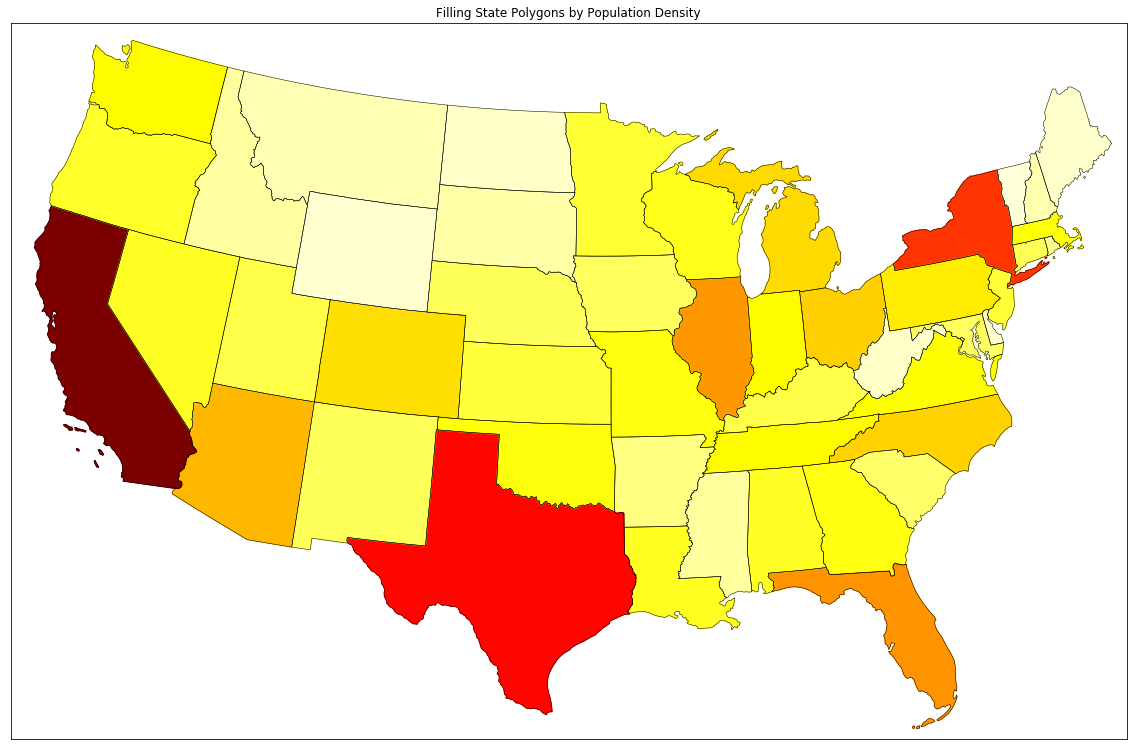

In [247]:
plt.title('Filling State Polygons by Population Density')

plt.show()